# Pandas Analysis and Reshaping 

## Overview 

Easier to work with a single `DataFrame` that you can slice, reshape, and aggregate.

No lists of `DataFrames`, `list`, etc.

<hr>

**`groupby`**:  Create aggreate tables with a single or multiple-index.

**`pivot`**: Create aggregate tables with two single or multiple-indecies.

**`melt`**: Reverse of `pivot`.

<hr>

`pivot` + *multiple index* is great for timeseries operations.


### Goal

Demonstrate how these concepts enabled the advanced analysis on a project with Vermont. 

Inspire this technique.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6)})
plt.style.use(['seaborn-whitegrid'])

import warnings
warnings.simplefilter('ignore')

import utils

## Apply revisit

In [2]:
filenames = ['data/measured_real_power.csv',
             'data/measured_reactive_power.csv']

df = utils.read_dir(filenames)
df.shape

(518440, 4)

In [4]:
df.head()

,timestamp,variable,attribute,value
0,2013-07-01 00:00:00,triplex_meter_0,measured_reactive_power,128.047
1,2013-07-01 00:01:00,triplex_meter_0,measured_reactive_power,128.047
2,2013-07-01 00:02:00,triplex_meter_0,measured_reactive_power,128.047
3,2013-07-01 00:03:00,triplex_meter_0,measured_reactive_power,128.047
4,2013-07-01 00:04:00,triplex_meter_0,measured_reactive_power,128.046


In [7]:
df['variable'].unique()

array(['triplex_meter_0', 'triplex_meter_1', 'triplex_meter_10',
       'triplex_meter_11', 'triplex_meter_12', 'triplex_meter_13',
       'triplex_meter_14', 'triplex_meter_15', 'triplex_meter_16',
       'triplex_meter_17', 'triplex_meter_18', 'triplex_meter_19',
       'triplex_meter_2', 'triplex_meter_3', 'triplex_meter_4',
       'triplex_meter_5', 'triplex_meter_6', 'triplex_meter_7',
       'triplex_meter_8', 'triplex_meter_9'], dtype=object)

### Pivoting and grouping

In [8]:
pivot = df.pivot_table(index='timestamp', columns=['variable', 'attribute'], values='value')
pivot.head()

variable                    triplex_meter_0                      \
attribute           measured_reactive_power measured_real_power   
timestamp                                                         
2013-07-01 00:00:00                 128.047             510.912   
2013-07-01 00:01:00                 128.047             510.912   
2013-07-01 00:02:00                 128.047             510.912   
2013-07-01 00:03:00                 128.047             510.912   
2013-07-01 00:04:00                 128.046             510.911   

variable                    triplex_meter_1                      \
attribute           measured_reactive_power measured_real_power   
timestamp                                                         
2013-07-01 00:00:00                 128.047             510.912   
2013-07-01 00:01:00                 128.047             510.912   
2013-07-01 00:02:00                 128.047             510.912   
2013-07-01 00:03:00                 128.047             510.912   
2013-07-01 00:04:00                 128.046             510.911   

variable                   triplex_meter_10                      \
attribute           measured_reactive_power measured_real_power   
timestamp                                                         
2013-07-01 00:00:00                 96.2761             384.146   
2013-07-01 00:01:00                 96.2761             384.146   
2013-07-01 00:02:00                 96.2761             384.146   
2013-07-01 00:03:00                 96.2761             384.146   
2013-07-01 00:04:00                 96.2774             384.151   

variable                   triplex_meter_11                      \
attribute           measured_reactive_power measured_real_power   
timestamp                                                         
2013-07-01 00:00:00                 96.2761             384.146   
2013-07-01 00:01:00                 96.2761             384.146   
2013-07-01 00:02:00                 96.2761             384.146   
2013-07-01 00:03:00                 96.2761             384.146   
2013-07-01 00:04:00                 96.2774             384.151   

variable                   triplex_meter_12                      \
attribute           measured_reactive_power measured_real_power   
timestamp                                                         
2013-07-01 00:00:00                 96.2761             384.146   
2013-07-01 00:01:00                 96.2761             384.146   
2013-07-01 00:02:00                 96.2761             384.146   
2013-07-01 00:03:00                 96.2761             384.146   
2013-07-01 00:04:00                 96.2774             384.151   

variable                    ...                 triplex_meter_5  \
attribute                   ...         measured_reactive_power   
timestamp                   ...                                   
2013-07-01 00:00:00         ...                         128.047   
2013-07-01 00:01:00         ...                         128.047   
2013-07-01 00:02:00         ...                         128.047   
2013-07-01 00:03:00         ...                         128.047   
2013-07-01 00:04:00         ...                         128.046   

variable                                        triplex_meter_6  \
attribute           measured_real_power measured_reactive_power   
timestamp                                                         
2013-07-01 00:00:00             510.912                 137.323   
2013-07-01 00:01:00             510.912                 137.323   
2013-07-01 00:02:00             510.912                 137.323   
2013-07-01 00:03:00             510.912                 137.323   
2013-07-01 00:04:00             510.911                 137.322   

variable                                        triplex_meter_7  \
attribute           measured_real_power measured_reactive_power   
timestamp                                                         
2013-07-01 00:00:00             547.924 

In [9]:
def func(x):
    return x.name, x.shape

pivot.groupby(level=0, axis=1).apply(func)

variable
triplex_meter_0      (triplex_meter_0, (12961, 2))
triplex_meter_1      (triplex_meter_1, (12961, 2))
triplex_meter_10    (triplex_meter_10, (12961, 2))
triplex_meter_11    (triplex_meter_11, (12961, 2))
triplex_meter_12    (triplex_meter_12, (12961, 2))
triplex_meter_13    (triplex_meter_13, (12961, 2))
triplex_meter_14    (triplex_meter_14, (12961, 2))
triplex_meter_15    (triplex_meter_15, (12961, 2))
triplex_meter_16    (triplex_meter_16, (12961, 2))
triplex_meter_17    (triplex_meter_17, (12961, 2))
triplex_meter_18    (triplex_meter_18, (12961, 2))
triplex_meter_19    (triplex_meter_19, (12961, 2))
triplex_meter_2      (triplex_meter_2, (12961, 2))
triplex_meter_3      (triplex_meter_3, (12961, 2))
triplex_meter_4      (triplex_meter_4, (12961, 2))
triplex_meter_5      (triplex_meter_5, (12961, 2))
triplex_meter_6      (triplex_meter_6, (12961, 2))
triplex_meter_7      (triplex_meter_7, (12961, 2))
triplex_meter_8      (triplex_meter_8, (12961, 2))
triplex_meter_9      (

In [10]:
import math
def compute_mag(df):
    total =  (df['measured_real_power']*df['measured_real_power'] + 
              df['measured_reactive_power']*df['measured_reactive_power'])
    
    return total.apply(math.sqrt)

def func(x):
    return compute_mag(x[x.name])

mag = pivot.groupby(level=0, axis=1).apply(func)
mag.head()

variable,triplex_meter_0,triplex_meter_1,triplex_meter_10,triplex_meter_11,triplex_meter_12,triplex_meter_13,triplex_meter_14,triplex_meter_15,triplex_meter_16,triplex_meter_17,triplex_meter_18,triplex_meter_19,triplex_meter_2,triplex_meter_3,triplex_meter_4,triplex_meter_5,triplex_meter_6,triplex_meter_7,triplex_meter_8,triplex_meter_9
timestamp,,,,,,,,,,,,,,,,,,,,
2013-07-01 00:00:00,526.713495,526.713495,396.026813,396.026813,396.026813,547.931970,547.931970,547.931970,547.262814,547.262814,279.508240,395.543294,526.713495,564.870176,526.713495,526.713495,564.870176,564.870176,599.625780,599.625780
2013-07-01 00:01:00,526.713495,526.713495,396.026813,396.026813,396.026813,547.931970,547.931970,547.931970,547.262814,547.262814,279.508240,395.543294,526.713495,564.870176,526.713495,526.713495,564.870176,564.870176,599.625780,599.625780
2013-07-01 00:02:00,526.713495,526.713495,396.026813,396.026813,396.026813,547.931970,547.931970,547.931970,547.262814,547.262814,279.508240,395.543294,526.713495,564.870176,526.713495,526.713495,564.870176,564.870176,599.625780,599.625780
2013-07-01 00:03:00,526.713495,526.713495,396.026813,396.026813,396.026813,547.931970,547.931970,547.931970,547.262814,547.262814,279.508240,395.543294,526.713495,564.870176,526.713495,526.713495,564.870176,564.870176,599.625780,599.625780
2013-07-01 00:04:00,526.712282,526.712282,396.031979,396.031979,396.031979,396.031979,547.939246,547.939246,547.266937,547.266937,279.510302,395.546399,526.712282,564.867993,526.712282,526.712282,564.867993,564.867993,599.634026,599.634026


In [11]:
mag_stack = mag.reset_index().melt(id_vars='timestamp') #includes the timestamp in the melting process but not as a variable
mag_stack['attribute'] = 'magnitude'
mag_stack.head()

,timestamp,variable,value,attribute
0,2013-07-01 00:00:00,triplex_meter_0,526.713495,magnitude
1,2013-07-01 00:01:00,triplex_meter_0,526.713495,magnitude
2,2013-07-01 00:02:00,triplex_meter_0,526.713495,magnitude
3,2013-07-01 00:03:00,triplex_meter_0,526.713495,magnitude
4,2013-07-01 00:04:00,triplex_meter_0,526.712282,magnitude


In [12]:
df.shape, mag_stack.shape

((518440, 4), (259220, 4))

In [13]:
pd.concat([df, mag_stack], axis=0).shape

(777660, 4)

## The Vermont Project 

### Characteristic

<hr>

Two feeders

Two seasons

1000 Waterheaters

Several control algorithms

Sometimes solar and batteries... 

**Many simulations**

### Questions

<hr>

What happends to the peak load?

What happends to the voltage?

What happends to the comfort of the customer?  We are **focusing** on this.

## The comfort data 

Original files on NREL's HPC

1 minute resolution for 14 days

One file per attribute (e.g. flow rate, water temperature)

This dataset is a collection of events where:

1. flow rate: **positive demand** (demand > 0) and **shower demand** (demand > 0.4)
2. temperature was below **110** and **105**

We use a `shift` value from the peak of a particular days to make the results align.

<br>


*Collected into a standard form for each simulation and concatenated into a single file*


<br>

The data

In [14]:
df = pd.read_csv("data/comfort_data.csv.gz",  compression='gzip')

# limit the data a bit...
qry = ["solar==0",
       "days==14",
       "strategy in ['no_control', 'smooth', 'single_bucket']"]

df = df.query(" and ".join(qry)) #as a logical operation for limiting the initial query
df.timestamp = pd.to_datetime(df.timestamp)
df.shape

(510680, 14)

In [15]:
df.head() #the shift value is the distance of the peak time to 0

,timestamp,name,value,attribute,feeder,solar,num_houses,season,strategy,control,days,shift,day,month
0,2013-08-05 06:40:00,zmq_waterheater_427,104.505,shower demand 105,one,0,1000,summer,no_control,0,14,-9.333333,5,8
1,2013-08-05 06:41:00,zmq_waterheater_427,103.360,shower demand 105,one,0,1000,summer,no_control,0,14,-9.316667,5,8
2,2013-08-05 06:42:00,zmq_waterheater_427,102.255,shower demand 105,one,0,1000,summer,no_control,0,14,-9.300000,5,8
3,2013-08-05 06:43:00,zmq_waterheater_427,101.188,shower demand 105,one,0,1000,summer,no_control,0,14,-9.283333,5,8
4,2013-08-05 06:44:00,zmq_waterheater_427,100.158,shower demand 105,one,0,1000,summer,no_control,0,14,-9.266667,5,8


In [16]:
(len(df.name.unique()), 
len(df.feeder.unique()), 
len(df.season.unique()),
len(df.strategy.unique()), 
len(df.control.unique()))

(903, 2, 2, 3, 5)

##  Reshaping with Pandas

`groupby`

`pivot_table`

`melt`

`applying`

Warm up with a single simulation... cuts down on the details.

In [17]:
qry = ["feeder=='one'",
       "season=='summer'",
       "strategy=='no_control'",
       "control==0",
       "attribute=='shower demand 110'"]

tmp = df.query(" and ".join(qry))
tmp.shape

(2049, 14)

How many unique customers are impacted over the period?

In [20]:
len(tmp.name.unique())

253

How long is the period?

In [21]:
tmp.timestamp.max() - tmp.timestamp.min()

Timedelta('13 days 22:38:00')

How many unique customer impacted per day?

#### `groupby`

In [22]:
tmp.head()

,timestamp,name,value,attribute,feeder,solar,num_houses,season,strategy,control,days,shift,day,month
145574,2013-07-31 16:01:00,zmq_waterheater_552,109.731,shower demand 110,one,0,1000,summer,no_control,0,14,0.016667,31,7
145575,2013-08-05 06:36:00,zmq_waterheater_427,109.567,shower demand 110,one,0,1000,summer,no_control,0,14,-9.400000,5,8
145576,2013-08-05 06:37:00,zmq_waterheater_427,108.189,shower demand 110,one,0,1000,summer,no_control,0,14,-9.383333,5,8
145577,2013-08-05 06:38:00,zmq_waterheater_427,106.918,shower demand 110,one,0,1000,summer,no_control,0,14,-9.366667,5,8
145578,2013-08-05 06:39:00,zmq_waterheater_427,105.690,shower demand 110,one,0,1000,summer,no_control,0,14,-9.350000,5,8


In [23]:
grp = tmp.groupby(['day', 'name'])['value'].count()
grp.head(20)

day  name               
1    zmq_waterheater_19      1
     zmq_waterheater_194    12
     zmq_waterheater_288    14
     zmq_waterheater_393     4
     zmq_waterheater_411     1
     zmq_waterheater_468     1
     zmq_waterheater_5      14
     zmq_waterheater_505     2
     zmq_waterheater_510     4
     zmq_waterheater_561     2
     zmq_waterheater_598    19
     zmq_waterheater_650     4
     zmq_waterheater_655     5
     zmq_waterheater_669    14
     zmq_waterheater_676     6
     zmq_waterheater_692     3
     zmq_waterheater_7      12
     zmq_waterheater_710     3
     zmq_waterheater_781     1
     zmq_waterheater_798    17
Name: value, dtype: int64

In [24]:
grp.reset_index().groupby(['day'])['name'].count()

day
1     30
2     24
3     39
4     38
5     35
6     27
7     38
8     19
9      3
26    37
27    37
28    34
29    23
30    35
31    26
Name: name, dtype: int64

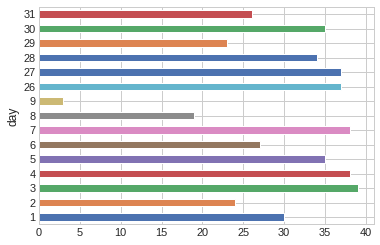

In [25]:
grp.reset_index().groupby(['day'])['name'].count().plot(kind='barh')

In [26]:
grp.reset_index().groupby(['day'])['name'].count().mean()

29.666666666666668

#### Another method  `pivot_table`

In [27]:
piv = tmp.pivot_table(index='day', 
                      columns='name', 
                      values='value', 
                      aggfunc='count')
piv.head()

name,zmq_waterheater_0,zmq_waterheater_113,zmq_waterheater_122,zmq_waterheater_143,zmq_waterheater_146,zmq_waterheater_148,zmq_waterheater_158,zmq_waterheater_163,zmq_waterheater_167,zmq_waterheater_170,...,zmq_waterheater_972,zmq_waterheater_974,zmq_waterheater_975,zmq_waterheater_976,zmq_waterheater_977,zmq_waterheater_98,zmq_waterheater_984,zmq_waterheater_985,zmq_waterheater_986,zmq_waterheater_993
day,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,6.0
2,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


I count because I want unique customers not total events.

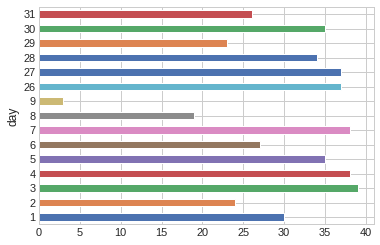

In [28]:
piv.count(axis=1).plot(kind='barh')

A customer was impacted more than once.

In [29]:
grp.reset_index().groupby(['day'])['name'].count().sum(), len(tmp.name.unique())

(445, 253)

Events per customer?

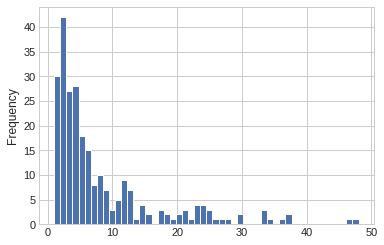

In [30]:
tmp.groupby(['name'])['value'].count().plot(kind='hist', bins=50)

Check on the number of events?

In [31]:
tmp.groupby(['name'])['value'].count().sum()

2049

## Question

### What is the average % of customers impacted as a function of time?

In [32]:
grp = tmp.groupby(['shift', 'day', 'name'])['value'].count()
grp.head()

shift       day  name               
-12.933333  7    zmq_waterheater_219    1
-12.916667  7    zmq_waterheater_219    1
-11.366667  26   zmq_waterheater_423    1
-11.350000  31   zmq_waterheater_908    1
-11.333333  31   zmq_waterheater_908    1
Name: value, dtype: int64

In [33]:
grp2 = grp.reset_index().groupby(['shift', 'day'])['value'].sum()
grp2.head()

shift       day
-12.933333  7      1
-12.916667  7      1
-11.366667  26     1
-11.350000  31     1
-11.333333  31     1
Name: value, dtype: int64

Make a pivot of the number of events per day (columns) as a function of shift (rows)

In [34]:
piv = grp2.reset_index().pivot_table(index='shift', 
                                     columns='day', 
                                     values='value').fillna(0)
piv.head()

day,1,2,3,4,5,6,7,8,9,26,27,28,29,30,31
shift,,,,,,,,,,,,,,,
-12.933333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-12.916667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-11.366667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
-11.350000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
-11.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


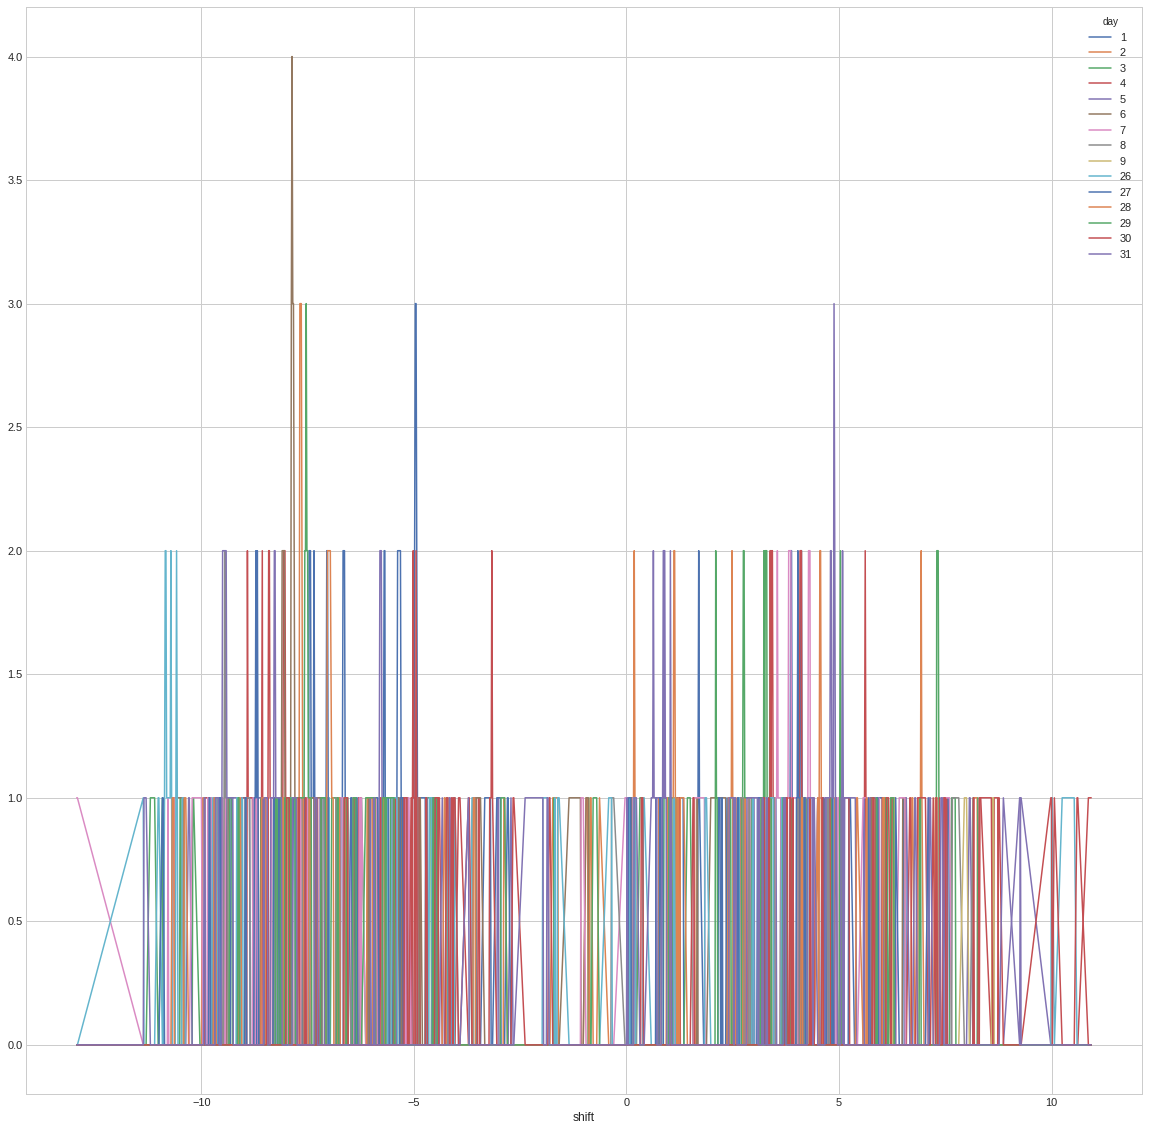

In [36]:
piv.plot(figsize=[20,20])

Check on the number of events.

In [37]:
piv.sum().sum()

2049.0

Events per minute.

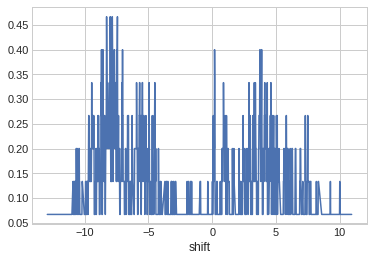

In [38]:
piv.fillna(0).mean(axis=1).plot()

####  What did we do?

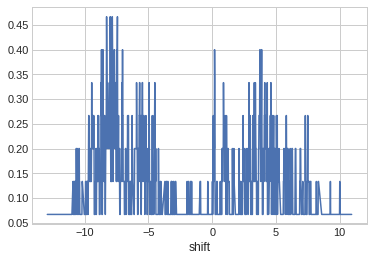

In [39]:
final = (tmp.groupby(['shift', 'day', 'name'])['value'].count()
            .reset_index().groupby(['shift', 'day'])['value'].sum()
            .reset_index().pivot_table(index='shift', 
                                       columns='day', 
                                       values='value').fillna(0)
            .mean(axis=1)
)

final.plot()

Using the multi-level pivot.

In [40]:
piv = tmp.pivot_table(index='shift', 
                      columns=['day', 'name'],
                      values='value', 
                      aggfunc='count')
piv.head()

day                        1                                           \
name       zmq_waterheater_19 zmq_waterheater_194 zmq_waterheater_288   
shift                                                                   
-12.933333                NaN                 NaN                 NaN   
-12.916667                NaN                 NaN                 NaN   
-11.366667                NaN                 NaN                 NaN   
-11.350000                NaN                 NaN                 NaN   
-11.333333                NaN                 NaN                 NaN   

day                                                                     \
name       zmq_waterheater_393 zmq_waterheater_411 zmq_waterheater_468   
shift                                                                    
-12.933333                 NaN                 NaN                 NaN   
-12.916667                 NaN                 NaN                 NaN   
-11.366667                 NaN                 NaN                 NaN   
-11.350000                 NaN                 NaN                 NaN   
-11.333333                 NaN                 NaN                 NaN   

day                                                                   \
name       zmq_waterheater_5 zmq_waterheater_505 zmq_waterheater_510   
shift                                                                  
-12.933333               NaN                 NaN                 NaN   
-12.916667               NaN                 NaN                 NaN   
-11.366667               NaN                 NaN                 NaN   
-11.350000               NaN                 NaN                 NaN   
-11.333333               NaN                 NaN                 NaN   

day                                    ...                          31  \
name       zmq_waterheater_561         ...         zmq_waterheater_721   
shift                                  ...                               
-12.933333                 NaN         ...                         NaN   
-12.916667                 NaN         ...                         NaN   
-11.366667                 NaN         ...                         NaN   
-11.350000                 NaN         ...                         NaN   
-11.333333                 NaN         ...                         NaN   

day                                                                     \
name       zmq_waterheater_744 zmq_waterheater_802 zmq_waterheater_849   
shift                                                                    
-12.933333                 NaN                 NaN                 NaN   
-12.916667                 NaN                 NaN                 NaN   
-11.366667                 NaN                 NaN                 NaN   
-11.350000                 NaN                 NaN                 NaN   
-11.333333                 NaN                 NaN                 NaN   

day                                                                     \
name       zmq_waterheater_863 zmq_waterheater_876 zmq_waterheater_908   
shift                                                                    
-12.933333                 NaN                 NaN                 NaN   
-12.916667                 NaN                 NaN                 NaN   
-11.366667                 NaN                 NaN                 NaN   
-11.350000                 NaN                 NaN                 1.0   
-11.333333                 NaN                 NaN                 1.0   

day                                                                     
name       zmq_waterheater_935 zmq_waterheater_946 zmq_waterheater_971  
shift                                                                   
-12.933333                 NaN                 NaN                 NaN  
-12.916667                 NaN                 NaN                 NaN  
-11.366667                 NaN                 NaN                 NaN  
-11.350000                 N

Check totals...

In [41]:
piv.sum(axis=1).sum()

2049.0

In [42]:
piv1 = piv.sum(axis=1, level=0).fillna(0)
piv1.head()

day,1,2,3,4,5,6,7,8,9,26,27,28,29,30,31
shift,,,,,,,,,,,,,,,
-12.933333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-12.916667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-11.366667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
-11.350000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
-11.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


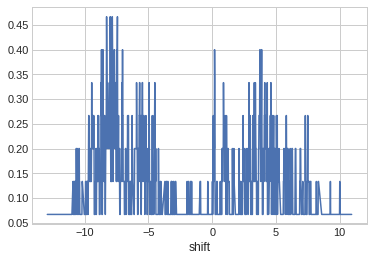

In [43]:
piv1.mean(axis=1).plot()

Recap in 4 steps

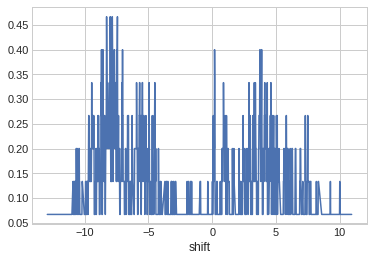

In [44]:
final = (tmp.pivot_table(index='shift', 
                         columns=['day', 'name'],
                         values='value', 
                         aggfunc='count')
            .sum(axis=1, level=0)
            .fillna(0)
            .mean(axis=1))
        
final.plot()

**groupby + pivot**

```python
final = (tmp.groupby(['shift', 'day', 'name'])['value'].count()
            .reset_index().groupby(['shift', 'day'])['value'].sum()
            .reset_index().pivot_table(index='shift', 
                                       columns='day', 
                                       values='value')
            .fillna(0)
            .mean(axis=1)
)
```

**multi-level pivot**

```python
final = (tmp.pivot_table(index='shift', 
                         columns=['day', 'name'],
                         values='value', 
                         aggfunc='count')
            .sum(axis=1, level=0)
            .fillna(0)
            .mean(axis=1))
```

Number of events every 10 minutes. (Have to add shift to a timestamp (randomly) then resample.)

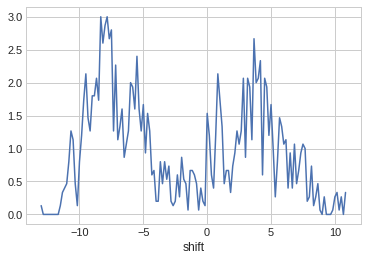

In [45]:
import datetime 

freq = "10min"

final = (tmp.pivot_table(index='shift', 
                         columns=['day', 'name'],
                         values='value', 
                         aggfunc='count')
            .sum(axis=1, level=0)
            .fillna(0))

dt_index = (pd.to_datetime("2013-07-01 13:00:00") + 
            final.index.map(lambda x: datetime.timedelta(hours=x)))

sample = final.set_index(dt_index).resample(freq).sum().fillna(0)
sample.index = (sample.index - pd.to_datetime("2013-07-01 13:00:00")).map(lambda x: x.total_seconds()/60./60.)

sample.mean(axis=1).plot()

What we did..

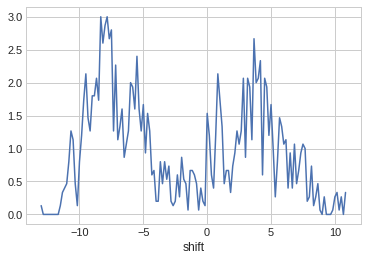

In [46]:
final = tmp.pivot_table(index='shift', columns=['day', 'name'], values='value', aggfunc='count')
            
final = final.sum(axis=1, level=0).fillna(0)

dt_index = pd.to_datetime("2013-07-01 13:00:00") + final.index.map(lambda x: datetime.timedelta(hours=x))
sample = final.set_index(dt_index).resample(freq).sum().fillna(0)
sample.index = (sample.index - pd.to_datetime("2013-07-01 13:00:00")).map(lambda x: x.total_seconds()/60./60.)

sample.mean(axis=1).plot()

## Many simulations

In [47]:
qry = ["feeder=='one'",
       "season=='summer'",
       "attribute=='shower demand 110'"]

tmp = df.query(" and ".join(qry))

In [48]:
final = tmp.pivot_table(index='shift', 
                         columns=['feeder', 'season', 'strategy', 'control', 'day', 'name'], 
                         values='value', 
                         aggfunc='count')
final.head()

feeder                    one                                          \
season                 summer                                           
strategy           no_control                                           
control                    0                                            
day                        1                                            
name       zmq_waterheater_19 zmq_waterheater_194 zmq_waterheater_288   
shift                                                                   
-12.966667                NaN                 NaN                 NaN   
-12.950000                NaN                 NaN                 NaN   
-12.933333                NaN                 NaN                 NaN   
-12.916667                NaN                 NaN                 NaN   
-12.466667                NaN                 NaN                 NaN   

feeder                                                                  \
season                                                                   
strategy                                                                 
control                                                                  
day                                                                      
name       zmq_waterheater_393 zmq_waterheater_411 zmq_waterheater_468   
shift                                                                    
-12.966667                 NaN                 NaN                 NaN   
-12.950000                 NaN                 NaN                 NaN   
-12.933333                 NaN                 NaN                 NaN   
-12.916667                 NaN                 NaN                 NaN   
-12.466667                 NaN                 NaN                 NaN   

feeder                                                                \
season                                                                 
strategy                                                               
control                                                                
day                                                                    
name       zmq_waterheater_5 zmq_waterheater_505 zmq_waterheater_510   
shift                                                                  
-12.966667               NaN                 NaN                 NaN   
-12.950000               NaN                 NaN                 NaN   
-12.933333               NaN                 NaN                 NaN   
-12.916667               NaN                 NaN                 NaN   
-12.466667               NaN                 NaN                 NaN   

feeder                                 ...                              \
season                                 ...                               
strategy                               ...                      smooth   
control                                ...                          75   
day                                    ...                          31   
name       zmq_waterheater_561         ...         zmq_waterheater_908   
shift                                  ...                               
-12.966667                 NaN         ...                         NaN   
-12.950000                 NaN         ...                         NaN   
-12.933333                 NaN         ...                         NaN   
-12.916667                 NaN         ...                         NaN   
-12.466667                 NaN         ...                         NaN   

feeder                                                                  \
season                                                                   
strategy                                                                 
control                                                                  
day                                                                      
name       zmq_waterheater_926 zmq_waterheater_935 zmq_waterheater_937   
shift                               

In [50]:
final = final.sum(axis=1, level=[0,1,2,3,4]).fillna(0)
final.head()

feeder            one                                              ...   \
season         summer                                              ...    
strategy   no_control                                              ...    
control            0                                               ...    
day                1    2    3    4    5    6    7    8    9    26 ...    
shift                                                              ...    
-12.966667        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    
-12.950000        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    
-12.933333        0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 ...    
-12.916667        0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 ...    
-12.466667        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    

feeder                                                          
season                                                          
strategy   smooth                                               
control        75                                               
day            6    7    8    9    26   27   28   29   30   31  
shift                                                           
-12.966667    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.950000    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.933333    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.916667    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.466667    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 135 columns]

In [51]:
dt_index = pd.to_datetime("2013-07-01 13:00:00") + final.index.map(lambda x: datetime.timedelta(hours=x))
sample = final.set_index(dt_index).resample('15min').sum().fillna(0)
sample.index = (sample.index - pd.to_datetime("2013-07-01 13:00:00")).map(lambda x: x.total_seconds()/60./60.)
sample.head()

feeder          one                                              ...          \
season       summer                                              ...           
strategy no_control                                              ...  smooth   
control          0                                               ...      75   
day              1    2    3    4    5    6    7    8    9    26 ...      6    
shift                                                            ...           
-13.00          0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0 ...     0.0   
-12.75          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...     0.0   
-12.50          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...     0.0   
-12.25          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...     0.0   
-12.00          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...     0.0   

feeder                                                 
season                                                 
strategy                                               
control                                                
day        7    8    9    26   27   28   29   30   31  
shift                                                  
-13.00    4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.75    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.50    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.25    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.00    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 135 columns]

In [52]:
sample = sample.mean(axis=1, level=[0,1,2,3])
sample.head()

feeder          one                                                        \
season       summer                                                         
strategy no_control single_bucket                                  smooth   
control          0             6         25        50        75        6    
shift                                                                       
-13.00     0.133333      0.133333  0.133333  0.133333  0.133333  0.133333   
-12.75     0.000000      0.000000  0.000000  0.000000  0.000000  0.000000   
-12.50     0.000000      0.000000  0.000000  0.000000  0.000000  0.000000   
-12.25     0.000000      0.000000  0.000000  0.000000  0.000000  0.000000   
-12.00     0.000000      0.000000  0.000000  0.000000  0.000000  0.000000   

feeder                             
season                             
strategy                           
control         25   50        75  
shift                              
-13.00    0.133333  0.2  0.266667  
-12.75    0.000000  0.0  0.000000  
-12.50    0.000000  0.0  0.133333  
-12.25    0.000000  0.0  0.000000  
-12.00    0.000000  0.0  0.000000

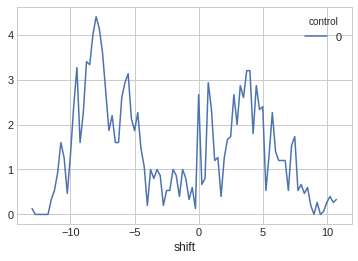

In [53]:
sample[('one', 'summer', 'no_control')].plot()

Look at all scenarios

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(10,6), sharex=True, sharey=True)

sample[('one', 'summer', 'no_control')].plot(ax=ax[0])
sample[('one', 'summer', 'smooth')].plot(ax=ax[1])
sample[('one', 'summer', 'single_bucket')].plot(ax=ax[2])

plt.tight_layout()

In [ ]:
sample['one'].plot()